<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Multimodal_RAG_using_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MultiModal RAG

Many documents contain a mixture of content types, including text and images.

Yet, information captured in images is lost in most RAG applications.

With the emergence of multimodal LLMs, like GPT-4V, it is worth considering how to utilize images in RAG:

## Steps Involved
* Use multimodal embeddings (such as CLIP) to embed images and text
* Retrieve both using similarity search
* Pass raw images and text chunks to a multimodal LLM for answer synthesis

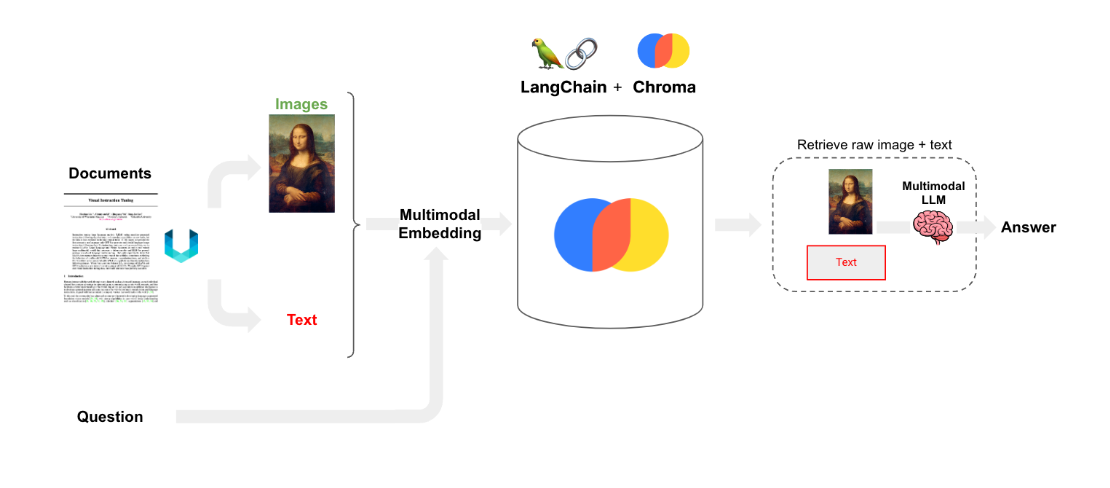

## Install required Packages

* For unstructured, you will also need poppler  and tesseract in our system.

* https://tesseract-ocr.github.io/tessdoc/Installation.html

* https://pdf2image.readthedocs.io/en/latest/installation.html

In [1]:
! pip install pdf2image
! pip install pytesseract
! apt install poppler-utils
! apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 2s (123 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
T

In [2]:
! pip install -U langchain openai chromadb langchain-experimental # (newest versions required for multi-modal)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.4/794.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.6/508.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# lock to 0.10.19 due to a persistent bug in more recent versions
! pip install "unstructured[all-docs]==0.10.19" pillow pydantic lxml pillow matplotlib tiktoken open_clip_torch torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.1/275.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

## Data Loading
Partition PDF text and images

In [8]:
import os
import shutil
#os.mkdir("Data")
! wget "https://www.getty.edu/publications/resources/virtuallibrary/0892360224.pdf"
shutil.move("0892360224.pdf","Data")

--2023-12-28 12:24:03--  https://www.getty.edu/publications/resources/virtuallibrary/0892360224.pdf
Resolving www.getty.edu (www.getty.edu)... 13.35.7.113, 13.35.7.63, 13.35.7.112, ...
Connecting to www.getty.edu (www.getty.edu)|13.35.7.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18838661 (18M) [application/pdf]
Saving to: ‘0892360224.pdf’

0892360224.pdf      100%[===================>]  17.97M  --.-KB/s    in 0.1s    

2023-12-28 12:24:03 (174 MB/s) - ‘0892360224.pdf’ saved [18838661/18838661]



'Data/0892360224.pdf'

## Folder with pdf and extracted images


In [12]:
path = "/content/Data/"

In [10]:
file_name = os.listdir(path)
file_name

['0892360224.pdf']

## Use partition_pdf below from Unstructured to extract text and images.

In [13]:
# Extract images, tables, and chunk text
from unstructured.partition.pdf import partition_pdf

raw_pdf_elements = partition_pdf(
    filename=path + file_name[0],
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path=path,
)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Categorize text elements by type


In [14]:
tables = []
texts = []
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        texts.append(str(element))

In [16]:
len(tables)

2

In [17]:
len(texts)

194

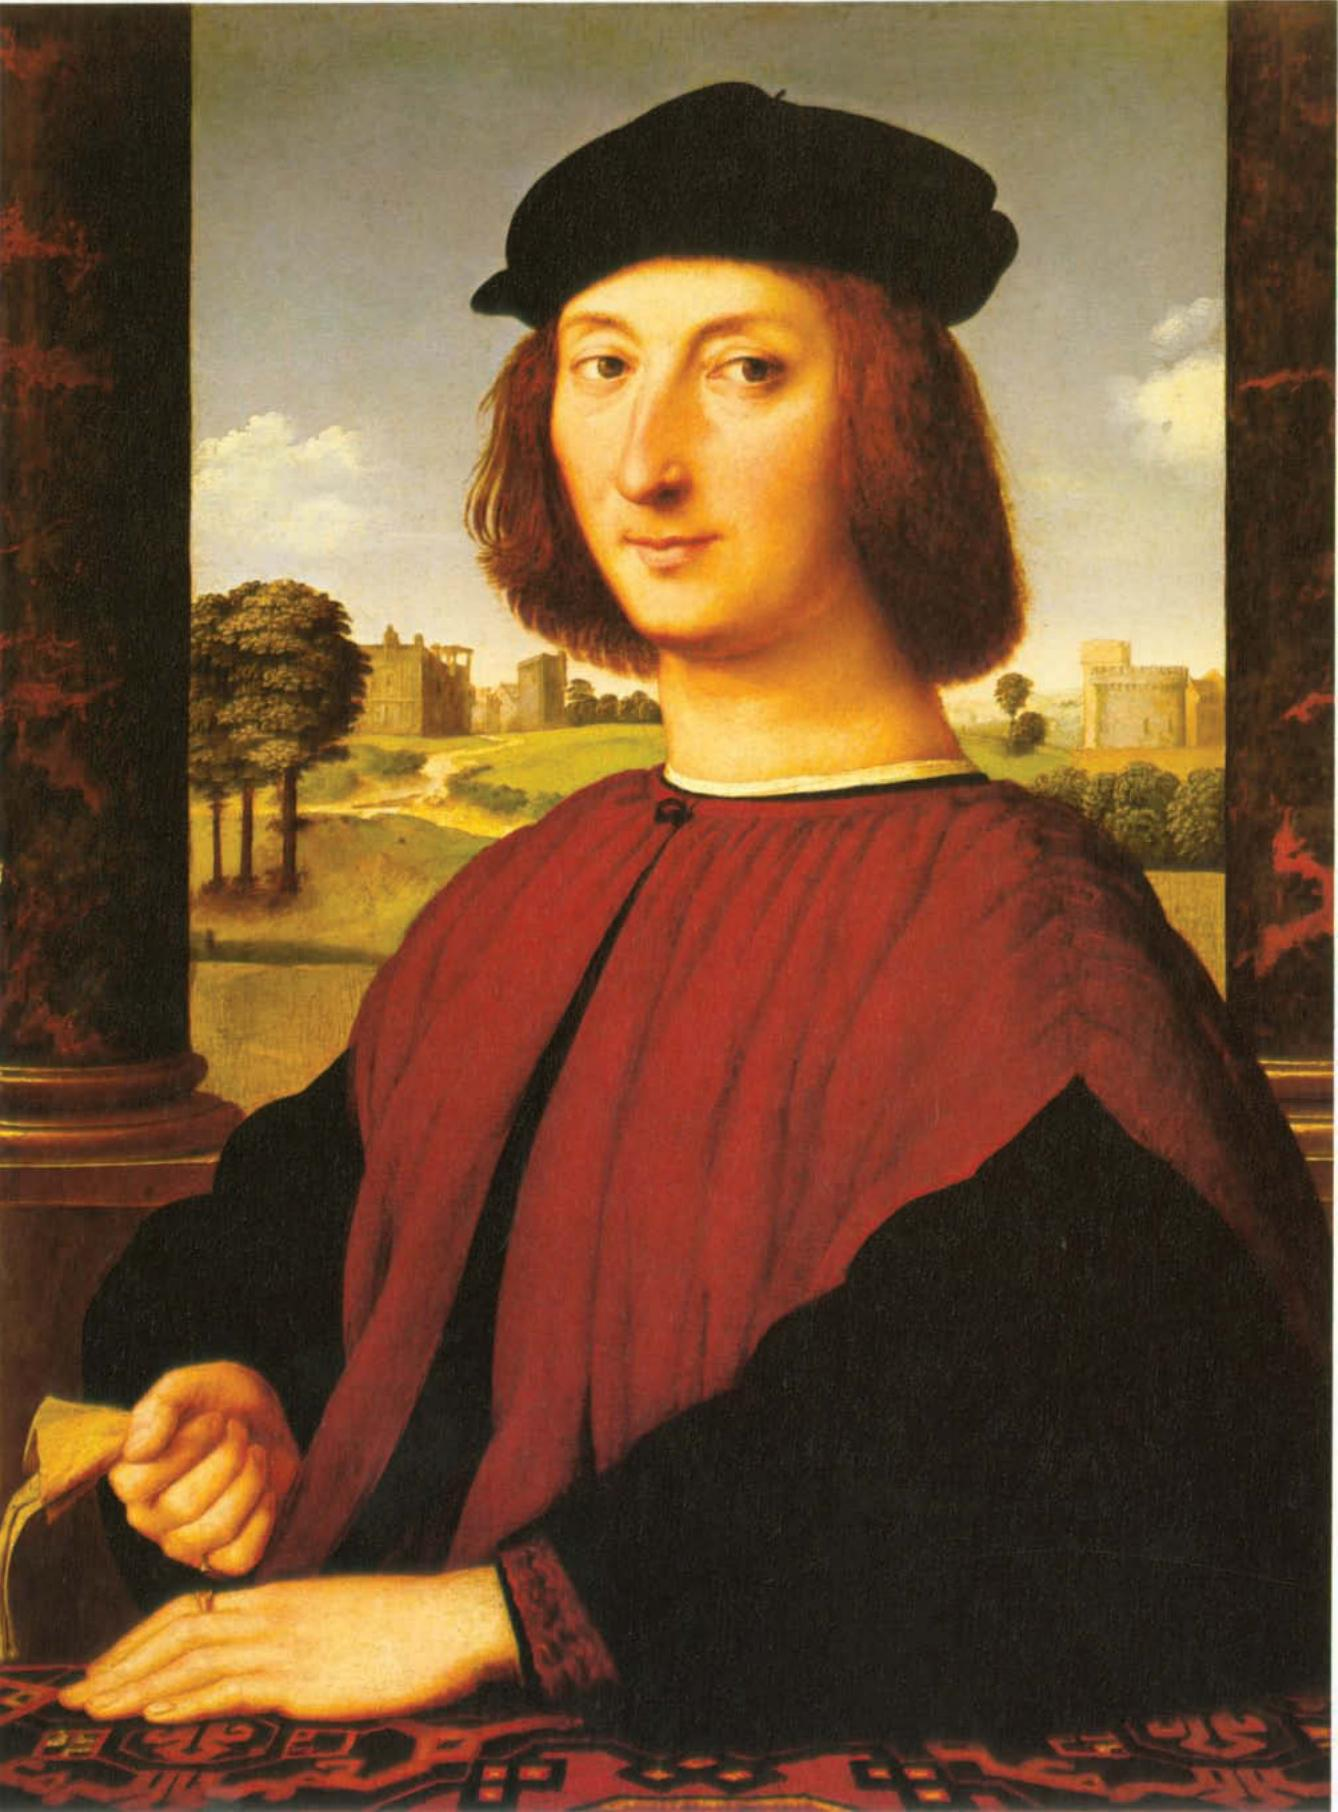

In [ ]:
from PIL import Image
Image.open("/content/data/figure-26-1.jpg")

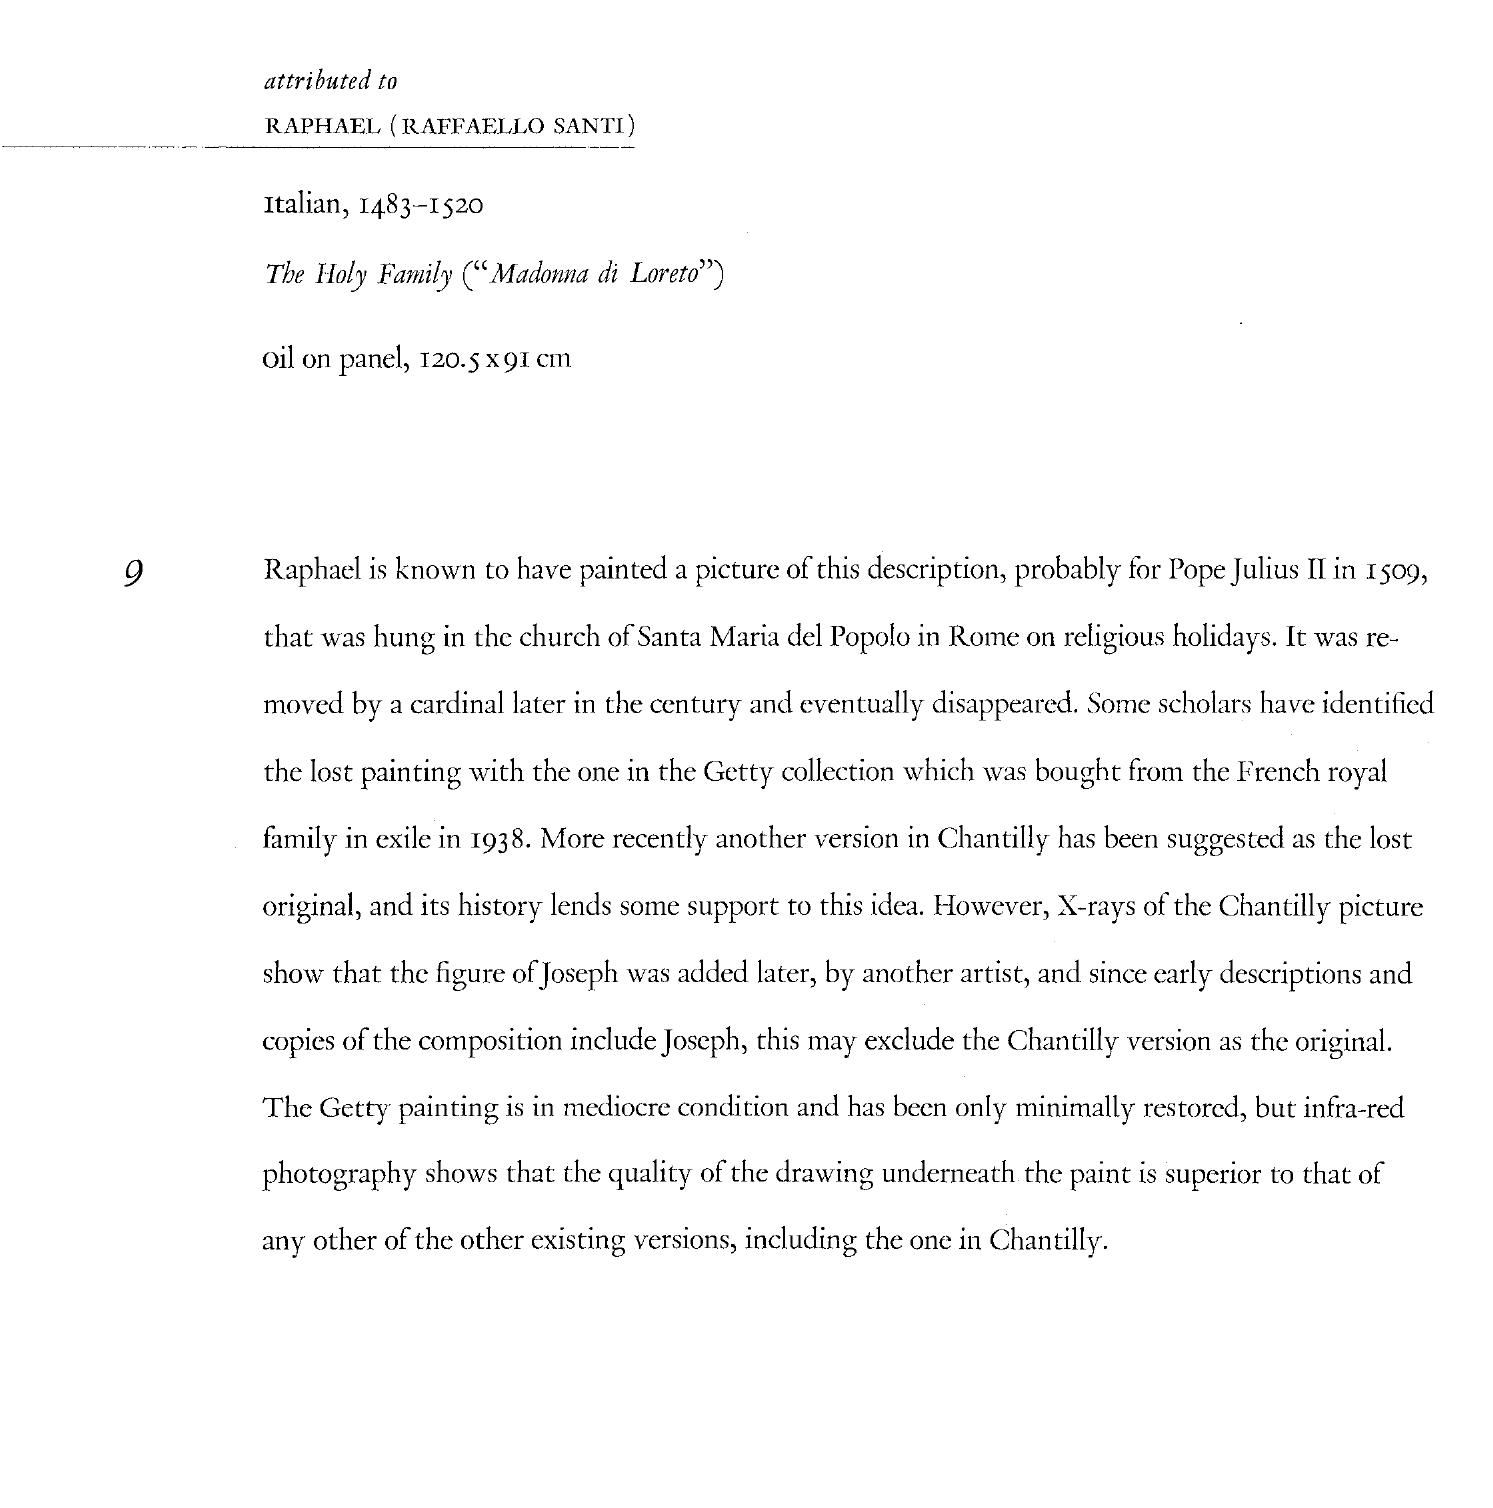

In [ ]:
Image.open("/content/data/figure-27-1.jpg")

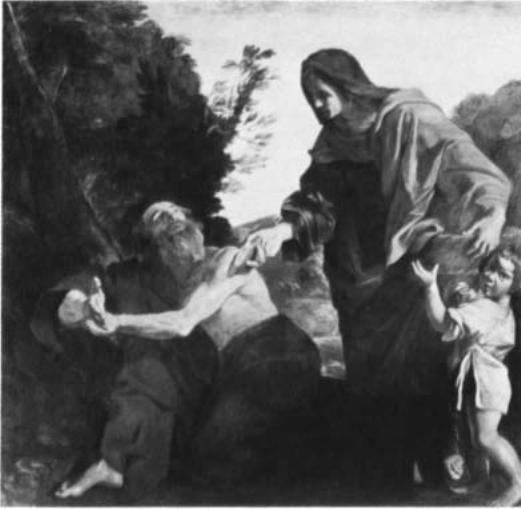

In [ ]:
Image.open("/content/data/figure-39-2.jpg")

## Multi-modal embeddings with our document
We will use OpenClip multimodal embeddings.

We use a larger model for better performance (set in langchain_experimental.open_clip.py).

model_name = "ViT-g-14"
checkpoint = "laion2b_s34b_b88k"

In [18]:
import os
import uuid

import chromadb
import numpy as np
from langchain.vectorstores import Chroma
from langchain_experimental.open_clip import OpenCLIPEmbeddings
from PIL import Image as _PILImage

# Create chroma
vectorstore = Chroma(
    collection_name="mm_rag_clip_photos", embedding_function=OpenCLIPEmbeddings()
)

# Get image URIs with .jpg extension only
image_uris = sorted(
    [
        os.path.join(path, image_name)
        for image_name in os.listdir(path)
        if image_name.endswith(".jpg")
    ]
)

# Add images
vectorstore.add_images(uris=image_uris)

# Add documents
vectorstore.add_texts(texts=texts)

# Make retriever
retriever = vectorstore.as_retriever()

open_clip_pytorch_model.bin:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

## RAG
vectorstore.add_images will store / retrieve images as base64 encoded strings.

These can be passed to GPT-4V.

In [19]:
import base64
import io
from io import BytesIO

import numpy as np
from PIL import Image


def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string.

    Args:
    base64_string (str): Base64 string of the original image.
    size (tuple): Desired size of the image as (width, height).

    Returns:
    str: Base64 string of the resized image.
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


def is_base64(s):
    """Check if a string is Base64 encoded"""
    try:
        return base64.b64encode(base64.b64decode(s)) == s.encode()
    except Exception:
        return False


def split_image_text_types(docs):
    """Split numpy array images and texts"""
    images = []
    text = []
    for doc in docs:
        doc = doc.page_content  # Extract Document contents
        if is_base64(doc):
            # Resize image to avoid OAI server error
            images.append(
                resize_base64_image(doc, size=(250, 250))
            )  # base64 encoded str
        else:
            text.append(doc)
    return {"images": images, "texts": text}

Currently, we format the inputs using a RunnableLambda while we add image support to ChatPromptTemplates.

#### Our runnable follows the classic RAG flow -

* We first compute the context (both "texts" and "images" in this case) and the question (just a RunnablePassthrough here)
* Then we pass this into our prompt template, which is a custom function that formats the message for the gpt-4-vision-preview model.
* And finally we parse the output as a string.

In [21]:
from operator import itemgetter

from langchain.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda, RunnablePassthrough,RunnableParallel


def prompt_func(data_dict):
    # Joining the context texts into a single string
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        image_message = {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{data_dict['context']['images'][0]}"
            },
        }
        messages.append(image_message)

    # Adding the text message for analysis
    text_message = {
        "type": "text",
        "text": (
            "As an expert art critic and historian, your task is to analyze and interpret images, "
            "considering their historical and cultural significance. Alongside the images, you will be "
            "provided with related text to offer context. Both will be retrieved from a vectorstore based "
            "on user-input keywords. Please use your extensive knowledge and analytical skills to provide a "
            "comprehensive summary that includes:\n"
            "- A detailed description of the visual elements in the image.\n"
            "- The historical and cultural context of the image.\n"
            "- An interpretation of the image's symbolism and meaning.\n"
            "- Connections between the image and the related text.\n\n"
            f"User-provided keywords: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)

    return [HumanMessage(content=messages)]


In [ ]:
from google.colab import userdata


openai_api_key = userdata.get('OPENAI_API_KEY')

model = ChatOpenAI(temperature=0,
                   openai_api_key=openai_api_key,
                   model="gpt-4-vision-preview",
                   max_tokens=1024)

# RAG pipeline
chain = (
    {
        "context": retriever | RunnableLambda(split_image_text_types),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(prompt_func)
    | model
    | StrOutputParser()
)

## Code to return Source Documents

In [27]:
from google.colab import userdata


openai_api_key = userdata.get('OPENAI_API_KEY')

model = ChatOpenAI(temperature=0,
                   openai_api_key=openai_api_key,
                   model="gpt-4-vision-preview",
                   max_tokens=1024)

# RAG pipeline
chain = (
    {
        "context": retriever | RunnableLambda(split_image_text_types),
        "question": RunnablePassthrough(),
    }
    | RunnableParallel({"response":prompt_func| model| StrOutputParser(),
                      "context": itemgetter("context"),})
)

In [28]:
chain.invoke("hunting on the lagoon")

{'response': 'The image depicts a serene scene of a Venetian lagoon, where groups of individuals are engaged in bird hunting. The visual elements include several boats, each with occupants dressed in red and white attire, which was typical of the period. Some of the figures are standing, aiming long poles or sticks into the water, while others are seated, rowing, or handling the boats. The presence of birds, both in flight and perched within the boats, suggests the use of decoys in the hunting process. The background features simple straw huts, indicating temporary shelters for the hunters, and the calm water reflects the sky, adding to the tranquility of the scene.\n\nThe historical and cultural context of this image is deeply rooted in the Italian Renaissance, specifically within the Venetian Republic. Vittore Carpaccio, the artist, was known for his genre paintings, which depicted scenes from everyday life with great attention to detail and realism. The inclusion of diverse figures,

In [57]:
response = chain.invoke("hunting on the lagoon")

In [30]:
response.keys()

dict_keys(['response', 'context'])

In [31]:
response['response']

'The image depicts a serene scene of a lagoon with several groups of people engaged in bird hunting. The visual elements include calm waters, boats with hunters wearing red and white clothing, and birds both in flight and used as decoys. The hunters appear to be using long poles, possibly to navigate through the shallow waters or to assist in the hunting process. In the background, there are simple straw huts, suggesting temporary shelters for the hunters. The sky is painted with soft clouds, and the overall color palette is muted, with the reds of the hunters\' clothing standing out against the blues and greens of the landscape.\n\nThe historical and cultural context of this image is rooted in the Italian Renaissance, specifically in Venice during the late 15th to early 16th century. Vittore Carpaccio, the artist, was known for his genre paintings, which depicted scenes from everyday life with great detail and realism. This painting, "Hunting on the Lagoon," is a testament to Carpacci

In [58]:
response['context']

{'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAD6APoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1eOe6JwZpD6HcaJLuZDtM8h+jVKOQBg5qncIFlZgwyeormTaESfa52GFlk/76NRvdTIrP58hA/wBs01G+YECke38xWw2M9jRJXBOxVOp3D7h5rjPH3jxVaWe8ONk8+P8AfJqUWMwbAQ1ftLMqpLAc/pQr9BP

In [32]:
response['context'].keys()

dict_keys(['images', 'texts'])

In [33]:
response['context']['images']

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAD6APoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1eOe6JwZpD6HcaJLuZDtM8h+jVKOQBg5qncIFlZgwyeormTaESfa52GFlk/76NRvdTIrP58hA/wBs01G+YECke38xWw2M9jRJXBOxVOp3D7h5rjPH3jxVaWe8ONk8+P8AfJqUWMwbAQ1ftLMqpLAc/pQr9BPzM2KW/Y/enP

## Display images related to text if any


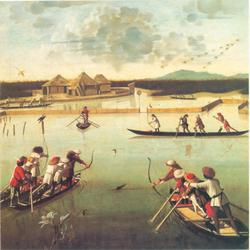

In [35]:
plt_img_base64(response['context']['images'][0])

## Test retrieval and run RAG

VITTORE  CARPACCIO Venetian, 1455/56-1525/26 Hunting  on the  Lagoon oil on panel, 75.9x63.7cm 6 Carpaccio  is considered to be the first great genre painter of the Italian Renaissance, and it is ob- vious that he was a careful observer of his surroundings. The  subject of this unusual painting is not yet completely understood, but it apparently depicts groups of Venetians, including some blacks, hunting for birds on the Venetian lagoon. Some birds standing upright in the boats must be decoys. In the background are huts built of straw, which the hunters must have used as temporary lodging. The  back of the painting shows an illusionistic cornice with some letters and memoranda—still legible—fastened  to the wall. The presence of a real hinge on the back indicates the painting was used as a door to a cupboard or more probably a window cover. It is therefore possible that one had the illusion of looking into the lagoon when the window was shuttered. The presence of a lily blossom at the 


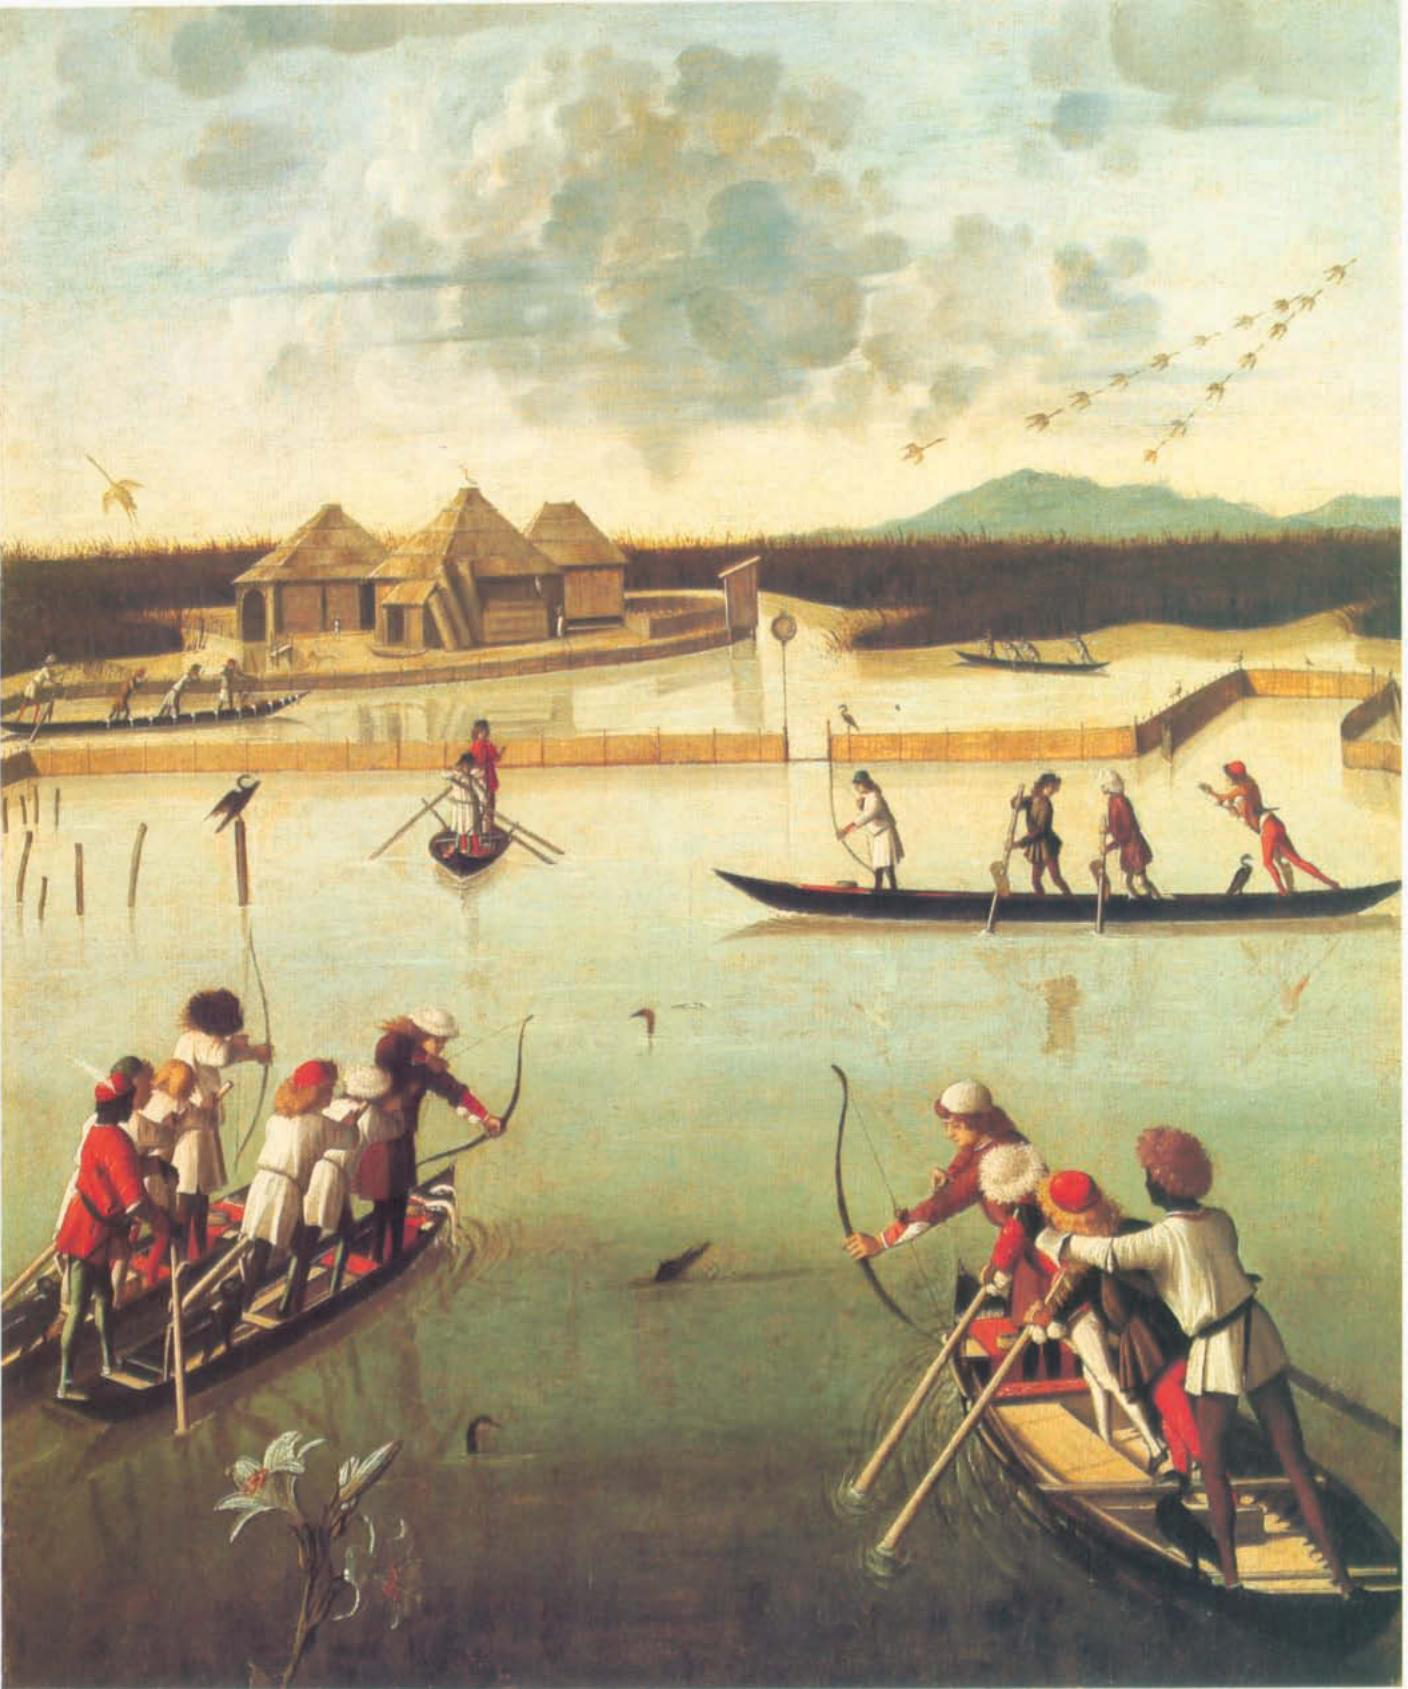

3

This painting was discovered only a few years ago. Unfortunately very little is known about its
18

personality and artistic interests, but he was most famous as a landscape painter.


In [23]:
from IPython.display import HTML, display


def plt_img_base64(img_base64):
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'

    # Display the image by rendering the HTML
    display(HTML(image_html))


docs = retriever.get_relevant_documents("hunting on the lagoon", k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

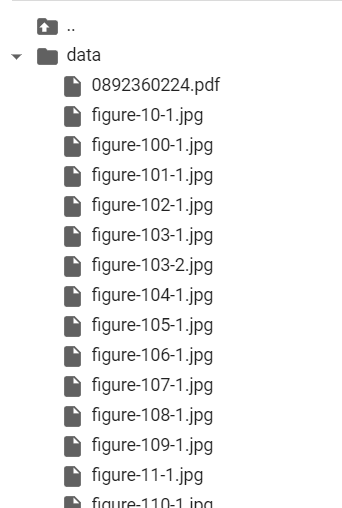

## Question 2

In [36]:
response = chain.invoke("Woman with children")

In [37]:
response['response']

"The image in question appears to be a portrait of a woman with children, painted in oil on canvas and measuring 94.4x114.2 cm. The woman is likely the central figure in the painting, and the children are probably depicted around her, possibly playing with various instruments as suggested by the text. The woman's age is given as 21, and the painting is dated 1632, which places it in the early 17th century.\n\nThe historical and cultural context of this image is significant. The early 17th century was a time of great change and upheaval in Europe, with the Thirty Years' War raging and the rise of absolutist monarchies. In the art world, this was the era of the Baroque, characterized by dramatic, emotional, and often theatrical compositions. The fact that the woman is identified by her age suggests that this is a portrait of a specific individual, possibly a member of the nobility or upper class, as such portraits were often commissioned to commemorate important life events or to display

In [38]:
response['context']

{'images': [],
 'texts': ['31\n\nThis portrait is dated 1632 and gives the age of the sitter, 21. To our eyes she would appear to be',
  '3\n\nThis painting was discovered only a few years ago. Unfortunately very little is known about its',
  'oil on canvas, 94.4x114.2 cm\n\n4l\n\nat which they want to play their various instruments.',
  'French, 1702-1766\n\n46\n\nThe sitter, Marc de Villiers, was born in 1671, and since this painting is signed and dated in 1747,']}

* No images has been detected for the text

## Question 3:

In [39]:
response = chain.invoke("maddona and child")

In [40]:
response['response']

'resolved.\n\nImage description:\nThe image depicts a tender moment between the Madonna and Child, a common theme in Christian art. The Madonna is shown holding the Child in her arms, with a gentle and loving expression on her face. The Child is depicted as a young and innocent figure, gazing up at his mother with trust and affection. The composition is intimate and focused, with the figures taking up most of the frame. The use of light and shadow creates a sense of depth and dimensionality, highlighting the figures and their interaction.\n\nHistorical and cultural context:\nThe Madonna and Child is a central motif in Christian art, representing the Virgin Mary and the infant Jesus. This theme has been depicted by countless artists throughout history, each bringing their own style and interpretation to the subject. The image in question is dated 1632, placing it in the Baroque period, a time known for its dramatic and emotional art. The fact that the painting was discovered only a few 

In [41]:
response['context']

{'images': [],
 'texts': ['31\n\nThis portrait is dated 1632 and gives the age of the sitter, 21. To our eyes she would appear to be',
  '3\n\nThis painting was discovered only a few years ago. Unfortunately very little is known about its',
  'Piedmontese painting, like that of Lombardy, has much in common with northern European painting.',
  'The authorship of this masterful little sketch has been much debated and may never be completely']}

## Question 4

In [42]:
response = chain.invoke("bust potrait of a man")

In [43]:
response['response']

"The image in question is a bust portrait of a man, painted in oil on canvas, measuring 144 x 114 cm. The visual elements of the image include the man's facial features, attire, and posture. He is likely depicted with a serious expression, wearing clothing indicative of his social status, and positioned in a way that conveys confidence and authority.\n\nThe historical and cultural context of the image suggests that the sitter was a member of the upper class, possibly a nobleman or a wealthy merchant. The fact that the portrait was commissioned by the fourth Earl of Essex indicates that the sitter held some significance or had a connection to the Earl. The date of the portrait, 1632, places it in the early 17th century, a time when portraiture was a popular way for the elite to showcase their wealth and status.\n\nThe symbolism and meaning of the image can be interpreted through the sitter's attire and posture. The clothing would have been expensive and fashionable for the time, indicat

In [44]:
response['context']

{'images': [],
 'texts': ['oil on canvas, 144 x 114 cm\n\n44\n\nThe sitter of this portrait is not known, but he can be presumed to have been a member of an\n\nin our portrait to a degree he rarely allowed himself.',
  '31\n\nThis portrait is dated 1632 and gives the age of the sitter, 21. To our eyes she would appear to be',
  '12\n\nwas a prolific artist, he did not paint many portraits. This is one of his largest and most impressive.',
  '48\n\nThis portrait was commissioned by the fourth Earl of Essex (William Anne Hollis) to commemorate']}

## Question 5

In [45]:
response = chain.invoke("bird catchers")

In [46]:
response['response']

"The image in question is an oil on canvas painting measuring 94.4x114.2 cm, which depicts a scene of bird catchers. The visual elements of the image likely include figures of individuals engaged in the act of capturing birds, possibly using various instruments or traps. The setting could be a natural landscape or a more domesticated environment, depending on the artist's intention.\n\nThe historical and cultural context of the image may relate to the practice of bird catching, which has been a part of human activity for centuries. In some cultures, birds were caught for food, while in others, they were captured for sport or for their song. The painting may also reflect the social and economic aspects of bird catching, such as the class or status of the individuals involved.\n\nThe symbolism and meaning of the image could vary depending on the artist's perspective. Birds are often seen as symbols of freedom and the act of catching them could represent a desire to control or possess tha

In [47]:
response['context']

{'images': [],
 'texts': ['oil on canvas, 94.4x114.2 cm\n\n4l\n\nat which they want to play their various instruments.',
  '34\n\nviewer to know what the artist had in mind.',
  '3\n\nThis painting was discovered only a few years ago. Unfortunately very little is known about its',
  "museum  staff to acquire paintings in fields he had not previously found interesting, such as Italian paintings of the fourteenth century, but  he remained reluctant to compete with  the world's  major museums for expensive paintings. He normally preferred to find works that  did not  cost significantly more than comparable examples of the  decorative  arts or Graeco-Roman antiquities. As a result, at the  time of his passing the  superb collection of French decorative arts and the very  good collection of antiquities  were accompanied by a collection of paintings that  did not  quite match them in importance. When Mr.  Getty left  the bulk of his estate to the museum in 1976, the opportunity  presented it

In [ ]:
docs = retriever.get_relevant_documents("fountain of love", k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

3

This painting was discovered only a few years ago. Unfortunately very little is known about its
6

Carpaccio is considered to be the first great genre painter of the Italian Renaissance, and it is ob-

was only the background.
18

personality and artistic interests, but he was most famous as a landscape painter.
34

viewer to know what the artist had in mind.


In [ ]:
chain.invoke("fountain of love")

"The image in question likely depicts a fountain, which is a common symbol of love and fertility in art history. The fountain may be surrounded by figures, possibly representing lovers or mythological beings associated with love, such as Cupid or Venus. The visual elements of the image would include the use of color, light, and composition to convey a sense of romance and emotion.\n\nThe historical and cultural context of the image would depend on the time period and location in which it was created. If the image is related to Carpaccio, an Italian Renaissance painter, it would have been created during a time when art was heavily influenced by classical mythology and the humanist movement. The Renaissance was a period of renewed interest in the classical past, and artists often depicted scenes from mythology or allegories of love and beauty.\n\nThe symbolism and meaning of the image could be interpreted in various ways. The fountain itself could represent the source of love or the flow

In [ ]:
docs = retriever.get_relevant_documents("portrait of Madame Bonier de la Mosson a", k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

48

This portrait was commissioned by the fourth Earl of Essex (William Anne Hollis) to commemorate
31

This portrait is dated 1632 and gives the age of the sitter, 21. To our eyes she would appear to be
French, 1702-1766

46

The sitter, Marc de Villiers, was born in 1671, and since this painting is signed and dated in 1747,
Flemish, 1488-1541

20

When Italian artists of the Renaissance came into contact with paintings from the north, they


In [48]:
response = chain.invoke("portrait of Madame Bonier de la Mosson a")


In [49]:
response['response']

"The portrait of Madame Bonier de la Mosson is a visually striking image that captures the essence of the sitter's personality and social status. The portrait features a woman dressed in elegant attire, with intricate details such as lace, embroidery, and jewelry that suggest her wealth and sophistication. The use of light and shadow in the painting creates a sense of depth and dimensionality, highlighting the sitter's features and drawing the viewer's attention to her face.\n\nThe historical and cultural context of the image is significant, as it was commissioned by the fourth Earl of Essex to commemorate a notable figure in French society during the early 18th century. Madame Bonier de la Mosson was a prominent member of the French aristocracy, and her portrait would have been a symbol of her status and influence. The fact that the portrait is dated 1632 and gives the age of the sitter as 21 suggests that it was created to mark a milestone in her life, such as her marriage or the bir

In [50]:
response['context']

{'images': [],
 'texts': ['48\n\nThis portrait was commissioned by the fourth Earl of Essex (William Anne Hollis) to commemorate',
  '31\n\nThis portrait is dated 1632 and gives the age of the sitter, 21. To our eyes she would appear to be',
  'French, 1702-1766\n\n46\n\nThe sitter, Marc de Villiers, was born in 1671, and since this painting is signed and dated in 1747,',
  'Flemish, 1488-1541\n\n20\n\nWhen Italian artists of the Renaissance came into contact with paintings from the north, they']}

In [60]:
docs = retriever.get_relevant_documents("Madonna and Child with Two Saints and a Donor", k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

MASTER  OF THE  LATHROP  TONDO Lucca, active late I5th century-early loth century Madonna  and  Child with  Two  Saints  and a  Donor Tempera on wood, 101.5 cm diameter 7  The identity of the artist responsible for this painting is not yet known, but one can deduce that he was active in Lucca and that he was trained, or at least strongly influenced, by Ghirlandaio and perhaps Filippino Lippi. His name is derived from  the present painting. The  two coats of arms seen suspended from  the throne in the center are those of two very prominent Lucchese families, the Guinigi and the Buonvisi. It has been proposed that this painting was executed to commemorate the marriage of Michèle Guinigi and Caterina Buonvisi in 1496, and the presence of St. Catherine on the right would tend to confirm it. This would imply that the kneeling donor is Michèle Guinigi but  would not explain the presence of St. Jerome on the  left. In any case, it is likely that our anonymous artist was the most respected pai

In [54]:
response = chain.invoke("sculptural character of Bartolomeo")

In [55]:
response['response']

"empire and beyond. His portraits are characterized by their sculptural quality, with figures often\ndepicted in three-quarter view and with a strong sense of volume and mass. This approach is\nevident in the portrait of St. John the Baptist, where the figure is rendered with a solidity and\npresence that is almost tangible. The use of light and shadow further enhances the sculptural\neffect, with the figure emerging from a dark background into the light.\n\nThe historical and cultural context of this image is significant. The portrait was created during the\nBaroque period, a time of great artistic innovation and experimentation. The Baroque style is\nknown for its dramatic use of light and shadow, its emphasis on emotion and movement, and its\ntendency to blur the lines between different art forms. The sculptural character of Bartolomeo's\nwork is a reflection of this broader artistic trend.\n\nThe image of St. John the Baptist is rich in symbolism and meaning. The figure is depicted

In [56]:
response['context']

{'images': [],
 'texts': ['Detail:  St. John the Baptist  ',
  '31\n\nThis portrait is dated 1632 and gives the age of the sitter, 21. To our eyes she would appear to be',
  'with only a few, prominent figures in active poses, is especially innovative and forceful.',
  '27\n\nMor, who was a native of Utrecht, enjoyed widespread recognition throughout the Hapsburg']}

In [ ]:
docs = retriever.get_relevant_documents("movements of John with those of Christ", k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

French and English Paintings of the ijth-igth centuries

Dutch and Flemish Paintings of the i^th-ijth centuries

Italian Renaissance and Baroque Paintings of the I4th-ijth centuries

BACCHIACCA, VERONESE, LOTTO, LANFRANCO,

DADDI, GENTILE, MASACCIO, VIVARINI, CARPACCIO,

REMBRANDT, GELDER, BERCHEM, STEEN, SWEERTS

MASTER OF THE LATHROP TONDO, RAPHAEL, FERRARI,

MASTER OF THE PARLEMENT DE PARIS, VAN ORLEY, MOR,

VAN DYCK, HONTHORST, ELIASZ., KALF, CLAESZ., LIEVENSZ.,

DE LA TOUR, POUSSIN, VOUET, LARGILLIERE, NATTIER, AVED,

CASTIGLIONE, DOLCI, ROSA, RICCI, CANALETTO, MAGNASCO

VAN DERWEYDEN, MASTER OF THE ST. BARTHOLOMEW ALTAR,
40

to the Orient and died in Goa in 1664, ending a brief and remarkable career.
1 7

upon these paintings done for his own priest.
MASTERPIECES:OF PAINTINGtHe: aJ.PAUL GETTY‘MUSEUM |.

         a i Tn4 y + - ‘ ’: }il | ;       


In [ ]:
chain.invoke(" movements of John with those of Christ")

'The image in question is not provided, but based on the user-provided keywords and the related text, we can infer that the image may depict a comparison or connection between the movements of John the Baptist and those of Jesus Christ. The text lists a range of European painters from different periods, suggesting that the image may be a painting from one of these artists or schools.\n\nThe historical and cultural context of the image would likely be rooted in the religious and artistic traditions of the time period from which the painting originates. The artists listed in the text are from the Italian Renaissance and Baroque periods, as well as the Dutch and Flemish Golden Age, and the French and English painting traditions of the 17th and 18th centuries. These periods were marked by a renewed interest in classical antiquity, humanism, and the exploration of religious themes in art.\n\nThe symbolism and meaning of the image would depend on the specific depiction of John and Christ. Jo

In [ ]:
query = "Madonna and Child with Two Saints and a Donor"
docs = retriever.get_relevant_documents(query, k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

MASTER  OF THE  LATHROP  TONDO Lucca, active late I5th century-early loth century Madonna  and  Child with  Two  Saints  and a  Donor Tempera on wood, 101.5 cm diameter 7  The identity of the artist responsible for this painting is not yet known, but one can deduce that he was active in Lucca and that he was trained, or at least strongly influenced, by Ghirlandaio and perhaps Filippino Lippi. His name is derived from  the present painting. The  two coats of arms seen suspended from  the throne in the center are those of two very prominent Lucchese families, the Guinigi and the Buonvisi. It has been proposed that this painting was executed to commemorate the marriage of Michèle Guinigi and Caterina Buonvisi in 1496, and the presence of St. Catherine on the right would tend to confirm it. This would imply that the kneeling donor is Michèle Guinigi but  would not explain the presence of St. Jerome on the  left. In any case, it is likely that our anonymous artist was the most respected pai

In [63]:
query ="paintings by Boucher"
docs = retriever.get_relevant_documents(query, k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

FRANCOIS  BOUCHER French, 1703-1770 The  Fountain of Love oil on canvas., 294.5 x 337.5 cm 47  Although in its present  form  this (and its companion of the same size) is one of the largest  paintings by the hand of Boucher, it was once half again as large as it now is. It was originally a finished cartoon (model) for a tapestry, one of a series known as the  "Noble Pastorales" Both paintings are dated 1748, and the tapestries, which were woven directly over the cartoons, were made for some years after  that. Eventually the cartoons were cut up into sections and sold separately.  The tapestries,  however, enable us to see how large the cartoons originally were and to know exactly how much is missing. The  subjects are meant to show various people, both peasants and aristocracy, in amorous games in the countryside.  In fact only the latter could afford  to behave this way, but it was fashionable to dress and act in a pseudo-rustic  manner. The Bird Catchers  
French and English Painting

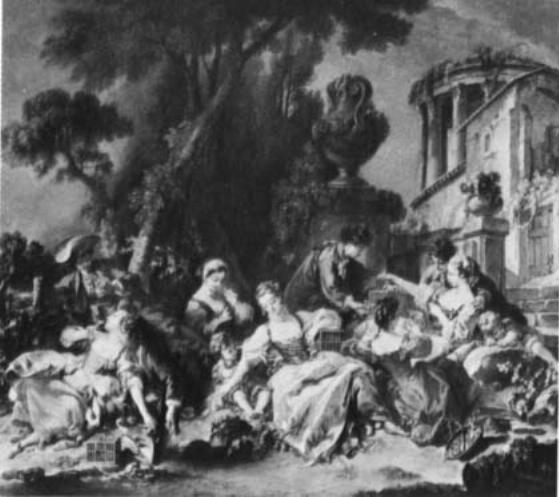

In [ ]:
Image.open("/content/data/figure-103-2.jpg")

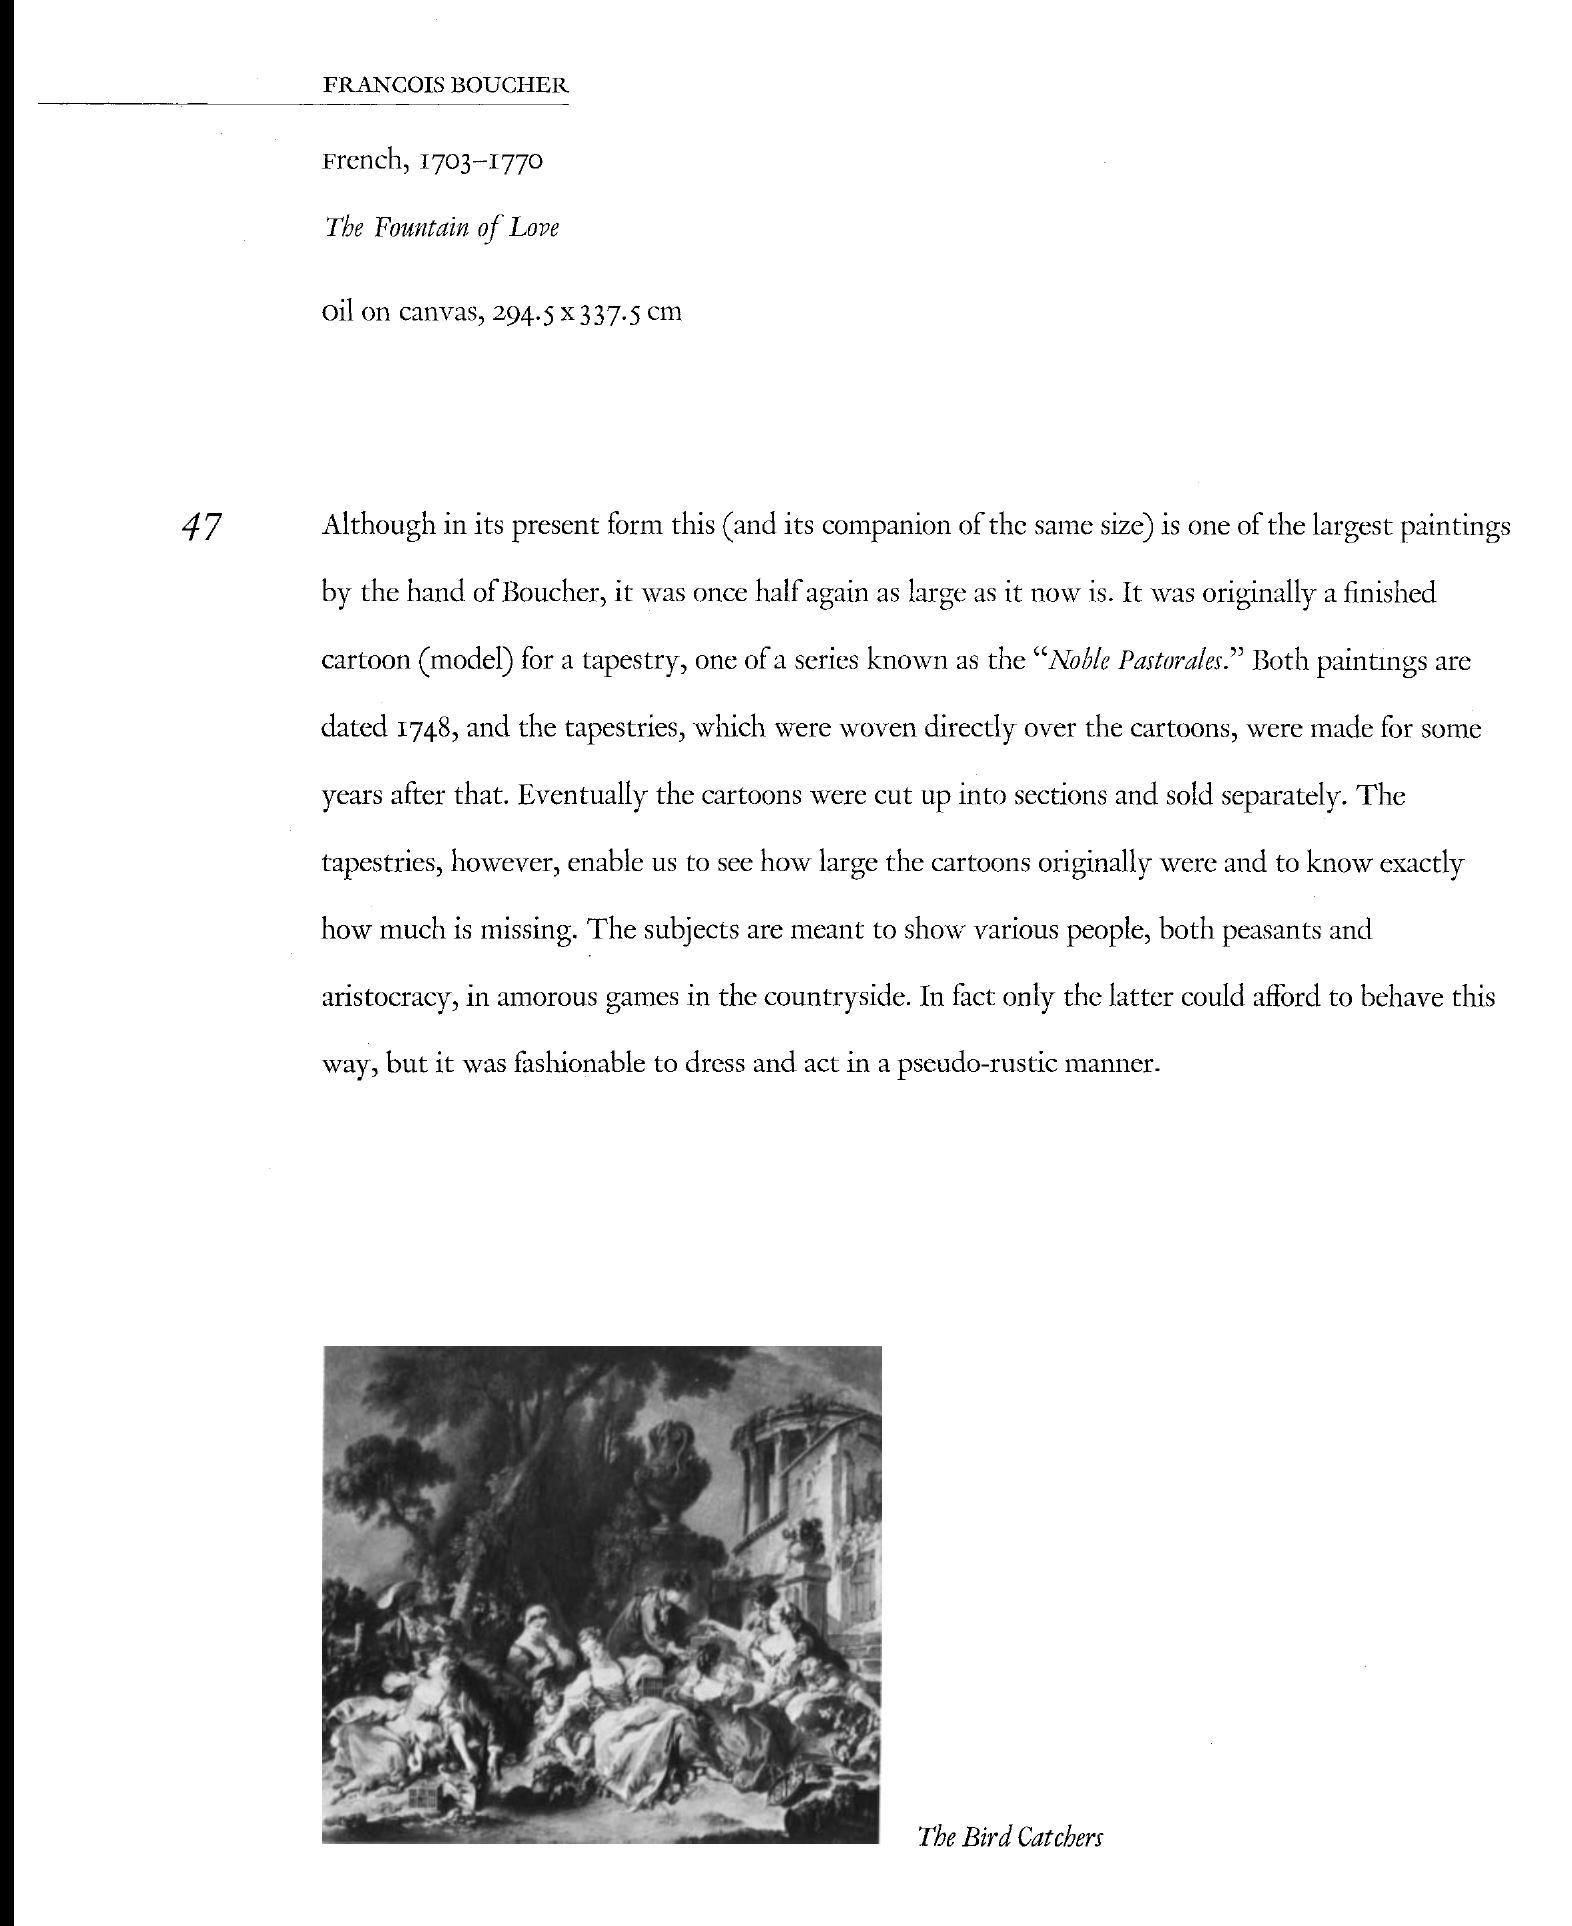

In [ ]:
Image.open("/content/data/figure-103-1.jpg")

16

The theme of Arcadian shepherds discovering a tomb originated in painting with Poussin in the



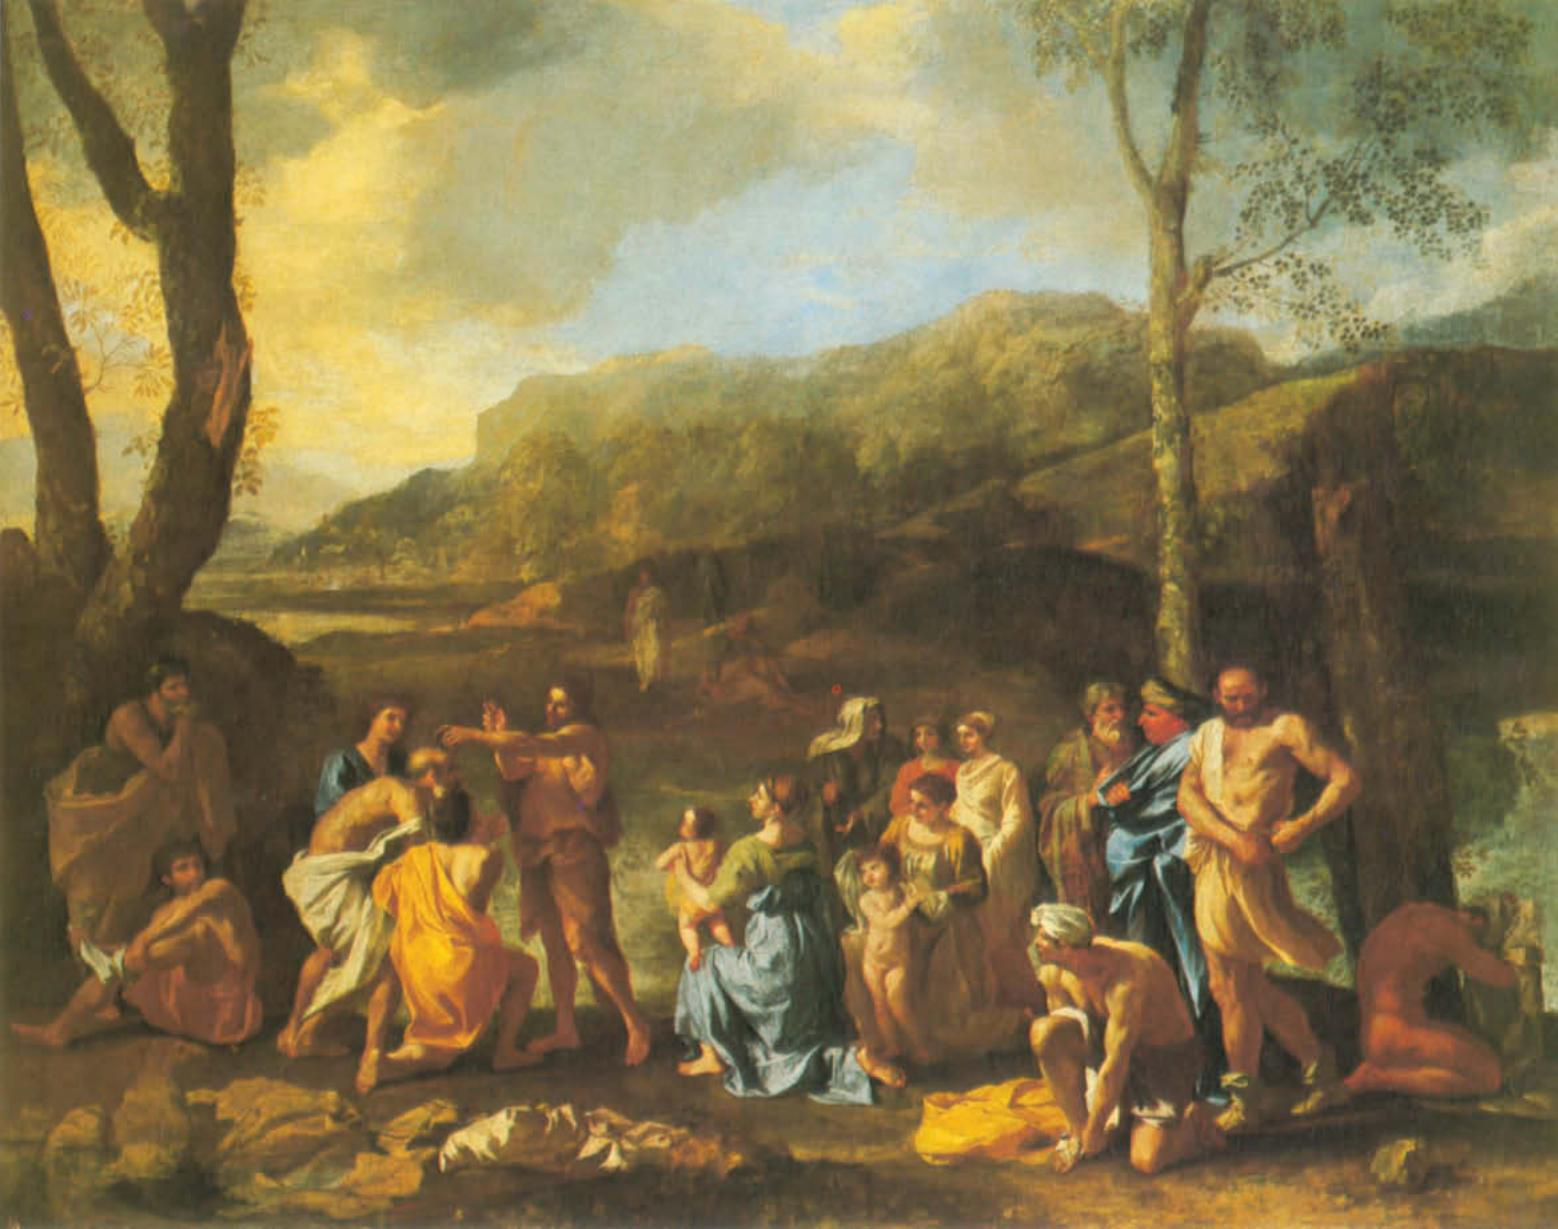


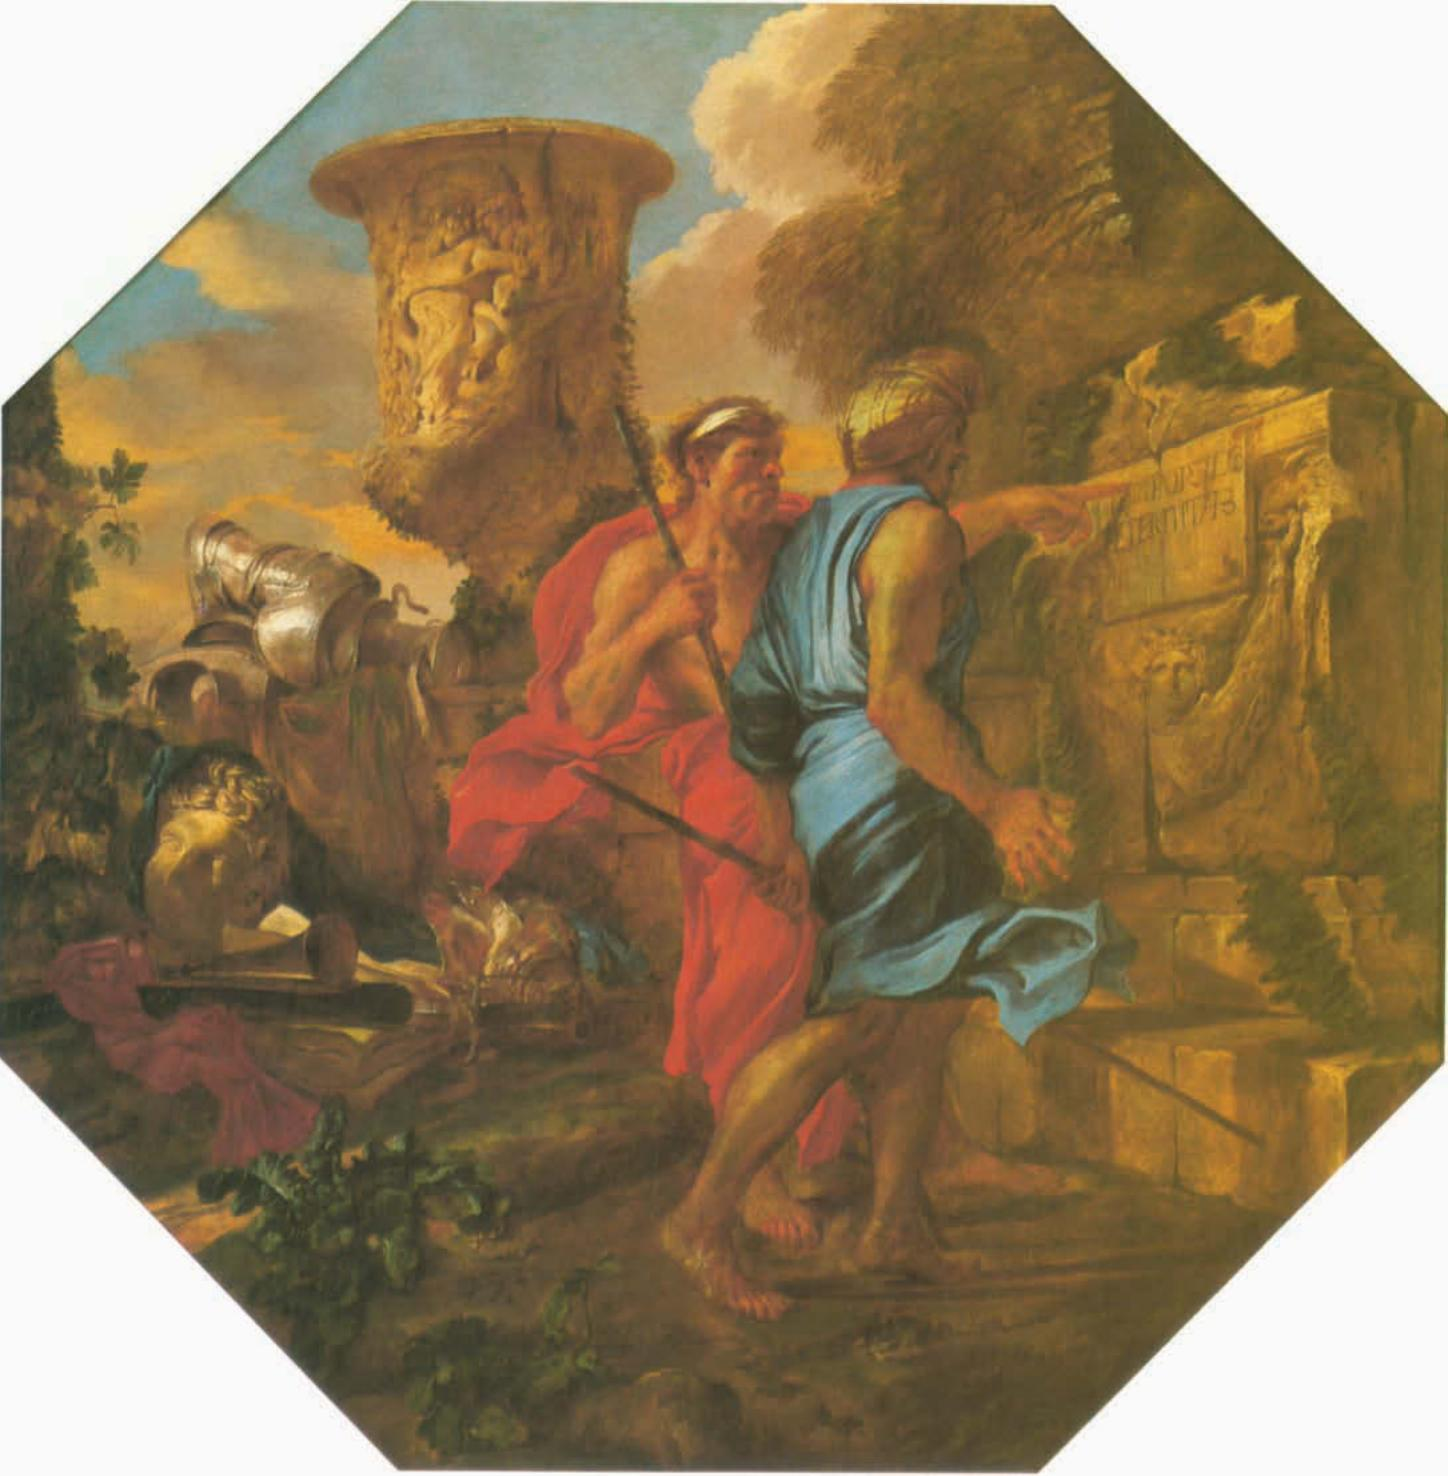

Flemish, 1488-1541

20

When Italian artists of the Renaissance came into contact with paintings from the north, they


In [64]:
query ="Moses and the Messengers from Canaan"
docs = retriever.get_relevant_documents(query, k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

In [65]:
response = chain.invoke("Moses and the Messengers from Canaan")

In [66]:
response['response']

'The image you\'ve provided appears to be a classical painting depicting a group of figures in a pastoral landscape. Unfortunately, the image does not directly correspond to the provided keywords "Moses and the Messengers from Canaan," nor does it seem to relate to the text snippets you\'ve included. However, I will do my best to analyze the image based on its visual elements and provide a general interpretation that might align with the themes of historical and cultural significance.\n\nVisual Elements:\n- The painting shows a group of people gathered in a natural setting, which seems to be a forest clearing or the edge of a wooded area.\n- The figures are dressed in what appears to be classical or ancient attire, suggesting a historical or mythological scene.\n- The color palette is composed of earthy tones, with a contrast between the light and shadow that gives depth to the scene.\n- The composition is balanced, with trees framing the scene on the left and the background opening up

In [67]:
response['context']

{'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAD6APoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDGvMNpKnI3rgj19Kuae3nW0UhYghcdfSq8MBuLFlU/MEPH0qDR5WdmtiepLD+teTJXi/I6Fubb5lidTwCME4rmpWksrhjkq6/KfWutto2MY4OCOd1cxr0ZF8flIBUYzSotc1hu9ilZ/v8AUIUzwXHX0613kcL

In [68]:
response['context']['images']

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAD6APoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDGvMNpKnI3rgj19Kuae3nW0UhYghcdfSq8MBuLFlU/MEPH0qDR5WdmtiepLD+teTJXi/I6Fubb5lidTwCME4rmpWksrhjkq6/KfWutto2MY4OCOd1cxr0ZF8flIBUYzSotc1hu9ilZ/v8AUIUzwXHX0613kcLCNmIUZOcA5r


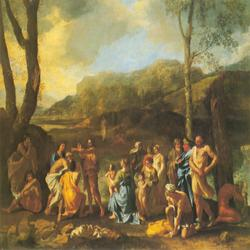


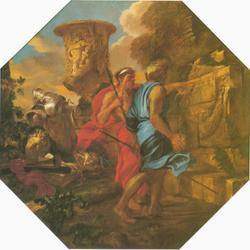

In [69]:
for images in response['context']['images']:
  plt_img_base64(images)
